# mehmetfatihdata

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')


In [2]:
education = pd.read_csv("education.csv")

# Q1:
Toplam gelir verilerini içeren TOTAL_REVENUE ve toplam harcama verilerini içeren TOTAL_EXPENDITURE değişkenlerini inceleyin. Bu değişkenler aykırı değerler içeriyor mu?

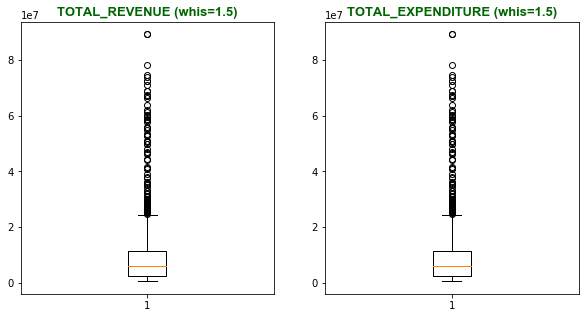

In [3]:
baslik_font = {'family': 'arial', 'color': 'darkgreen','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
fig=plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.boxplot(education["TOTAL_REVENUE"], )
plt.title("TOTAL_REVENUE (whis=1.5)", fontdict=baslik_font)
plt.subplot(1,2,2)
plt.boxplot(education["TOTAL_REVENUE"], )
plt.title("TOTAL_EXPENDITURE (whis=1.5)", fontdict=baslik_font)
plt.show()

In [4]:
from scipy.stats import zscore

z_scores = zscore(education["TOTAL_REVENUE"])
for threshold in range(1,6):
    print("Eşik değeri: {}".format(threshold))
    print("Aykırı değerlerin sayısı: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Eşik değeri: 1
Aykırı değerlerin sayısı: 142
------
Eşik değeri: 2
Aykırı değerlerin sayısı: 57
------
Eşik değeri: 3
Aykırı değerlerin sayısı: 42
------
Eşik değeri: 4
Aykırı değerlerin sayısı: 28
------
Eşik değeri: 5
Aykırı değerlerin sayısı: 14
------


In [5]:
q75, q25 = np.percentile(education["TOTAL_REVENUE"], [75 ,25])
caa = q75 - q25

In [7]:
degerler = pd.DataFrame(columns=['esik_degeri', 'aykiri_deger_sayisi'])
for esik_degeri in np.arange(1,10):
    min_deger = q25 - (caa*esik_degeri)
    maks_deger = q75 + (caa*esik_degeri)
    aykiri_deger_sayisi = len((np.where((education["TOTAL_REVENUE"] > maks_deger)| 
                                       (education["TOTAL_REVENUE"] < min_deger))[0]))
    degerler = degerler.append({'esik_degeri': esik_degeri,'aykiri_deger_sayısı': aykiri_deger_sayisi}, 
                                           ignore_index=True)
degerler

,esik_degeri,aykiri_deger_sayisi,aykiri_deger_sayısı
0,1.0,NaN,146.0
1,2.0,NaN,74.0
2,3.0,NaN,48.0
3,4.0,NaN,39.0
4,5.0,NaN,27.0
5,6.0,NaN,14.0
6,7.0,NaN,5.0
7,8.0,NaN,2.0
8,9.0,NaN,0.0


# Q2:
Toplam gelir (TOTAL_REVENUE) ve toplam harcama (TOTAL_EXPENDITURE) değişkenlerinde aykırı değer tespit ettiyseniz bu derste öğrendiğiniz teknikleri uygulayarak bu aykırı değerleri ortadan kaldırın ve bunu yaptıktan sonra hiçbir aykırı değer kalmadığını doğrulayın.


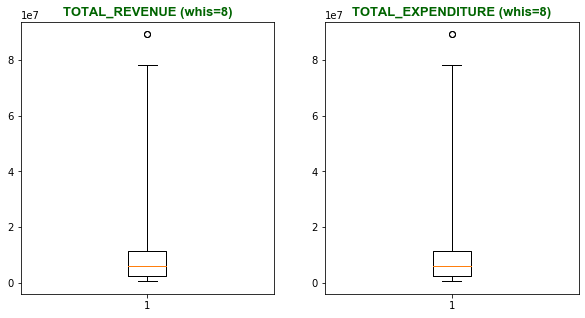

In [8]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(education["TOTAL_REVENUE"], whis=8)
plt.title("TOTAL_REVENUE (whis=8)", fontdict=baslik_font)
plt.subplot(1,2,2)
plt.boxplot(education["TOTAL_REVENUE"], whis=8)
plt.title("TOTAL_EXPENDITURE (whis=8)", fontdict=baslik_font)
plt.show()

In [9]:
z_scores = zscore(education["TOTAL_REVENUE"])
threshold =8
print("Eşik değeri: {}".format(threshold))
print("Aykırı değerlerin sayısı: {}".format(len((np.where(z_scores > threshold)[0]))))
print('------')

Eşik değeri: 8
Aykırı değerlerin sayısı: 0
------


# Q3:
Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama (TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temezlemeden). Bu yeni değişkende de aykırı değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.


In [ ]:
egitim1=egitim.copy()

In [ ]:
fill_list=['ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']
years=egitim1["YEAR"].unique()
for col in fill_list:
    for year in years:
        egitim1[col]=egitim1[col].fillna(egitim1.groupby(egitim1["YEAR"]==year)[col].transform("mean"))
egitim1.head(2)

In [ ]:
egitim1.isnull().sum()*100/egitim1.shape[0]

In [ ]:
egitim2=egitim.copy()

In [ ]:
egitim2.interpolate(method ='pad', limit_direction ='both') 

In [ ]:
unique_count = []
for x in egitim2.columns:
    unique_count.append([x,len(egitim2[x].unique()),egitim2[x].isnull().sum()])
    
print("Dataframe Dimension: {} Rows, {} Columns".format(*egitim2.shape))
pd.DataFrame(unique_count, columns=["Column","Unique","Missing"]).set_index("Column").T

In [ ]:
plt.subplot(151)
plt.hist(egitim["TOTAL_REVENUE"])
plt.subplot(152)
plt.hist(egitim["TOTAL_EXPENDITURE"])
plt.subplot(153)
plt.hist(egitim["GRADES_ALL_G"])
plt.subplot(154)
plt.hist(egitim["AVG_MATH_8_SCORE"])
plt.subplot(155)
plt.hist(egitim["AVG_READING_8_SCORE"])